##Library and PyPI

In [17]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

##Data Preprocessing

In [5]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")
dataset.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,SE,FT,Security Specialist,211000,USD,211000,US,100,US,L
1,2022,SE,FT,DevOps Security Engineer,120000,CAD,95213,CA,100,CA,L
2,2022,SE,FT,Information Security Manager,174000,BRL,31203,BR,100,BR,L
3,2022,EX,FT,Head of Security,220000,USD,220000,US,100,US,L
4,2022,SE,FT,Cybersecurity Analyst,180000,BRL,32279,BR,100,BR,L


In [3]:
# Similar to visualization, we clean our dataset

# delete 'SG' and 'ML' rows
# dataset = dataset.drop(dataset[dataset.company_location == 'SG'].index)
# dataset = dataset.drop(dataset[dataset.company_location == 'ML'].index)

# change iso code 'UM', 'AS' to 'US'
# dataset = dataset.replace(['UM', 'AS'],'US')

#convert from string to number
# mapping = {'S': 1, 'M': 2,'L':3}
# dataset=dataset.replace(to_replace="M",value=2)
# dataset=dataset.replace(to_replace="L",value=3)
# dataset=dataset.replace(to_replace="S",value=1)

# dataset=dataset.replace(to_replace="EN",value=1)
# dataset=dataset.replace(to_replace="MI",value=2)
# dataset=dataset.replace(to_replace="SE",value=3)
# dataset=dataset.replace(to_replace="EX",value=4)

In [6]:
#check the correlation of the dataset
# corr = dataset.corr()
# fig, ax = plt.subplots(figsize=(20,10))
# sns.heatmap(corr,annot=True,cmap = 'YlGnBu')
# plt.savefig("correlation.png")
# re [0,50,100]

In [7]:
#utilize the job title  
dataset = dataset.replace('Cybersecurity Training Specialist','Cyber Security Training Specialist')
dataset = dataset.replace('Cybersecurity Researcher','Cyber Security Researcher')
dataset = dataset.replace('Cybersecurity Engineer','Cyber Security Engineer')
dataset = dataset.replace('Cybersecurity Architect','Cyber Security Architect')
dataset = dataset.replace('Cybersecurity Specialist','Cyber Security Specialist')
dataset = dataset.replace('Cybersecurity Analyst','Cyber Security Analyst') 

In [10]:
#split by year, we only interest in 2020 and 2021
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2020 = dataset[dataset["work_year"] == '2020']
# dataset_2021e = dataset[dataset["work_year"] == '2022e']

In [11]:
# Now we want to clean the job title

# job-titles in 2020,2021 and 2021e
dataset_2020_job = dataset_2020.job_title.unique()
dataset_2021_job = dataset_2021.job_title.unique()
# dataset_2021e_job = dataset_2021e.job_title.unique()

# Find jobs only in one of the two year job sets
unmatched_ids_20_21 = np.setxor1d(dataset_2021_job,dataset_2020_job) 
# unmatched_ids_20_21e = np.setxor1d(dataset_2021e_job,dataset_2020_job) 

In [12]:

data_in_20_not_in_21 = dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()
data_in_21_not_in_20 = dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()


In [13]:
# we only consider the job title which occurs both in 2020 and 2021
pure_data_2020_def = dataset_2020.drop(dataset_2020[dataset_2020.job_title.isin(data_in_20_not_in_21)].index)
pure_data_2021_def = dataset_2021.drop(dataset_2021[dataset_2021.job_title.isin(data_in_21_not_in_20)].index)

## Which job earn more money? Can man get higher pay when he has deeper experience?
We focus on full time jobs required entry and mid level of experience

In [101]:
#2020
pure_data_2020_FT = pure_data_2020_def[pure_data_2020_def.employment_type =='FT' ]
pure_data_2020_FT = (
    pure_data_2020_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2020_FT_en = pure_data_2020_FT[pure_data_2020_FT.experience_level == 'EN']
pure_data_2020_FT_en = pure_data_2020_FT_en.sort_values('salary_in_usd')
job_title_2020 = pure_data_2020_FT_en.job_title.tolist()
salary_2020 = pure_data_2020_FT_en.salary_in_usd.tolist()

In [102]:
#2021
pure_data_2021_FT = pure_data_2021_def[pure_data_2021_def.employment_type =='FT' ]
pure_data_2021_FT = (
    pure_data_2021_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2021_FT_en = pure_data_2021_FT[pure_data_2021_FT.experience_level == 'EN']
pure_data_2021_FT_en = pure_data_2021_FT_en.sort_values('salary_in_usd')
job_title_2021 = pure_data_2021_FT_en.job_title.tolist()
salary_2021 = pure_data_2021_FT_en.salary_in_usd.tolist()

In [103]:
# mean and variance:
m1 = np.mean(salary_2020)
m2 = np.mean(salary_2021)
v1 = np.var(salary_2020)
v2 = np.var(salary_2021)
m1,m2,v1,v2

(57868.938095238096, 59636.4359057971, 1145939687.7525172, 767434947.4460164)

In [104]:
pure_data_2020_FT_mi = pure_data_2020_FT[pure_data_2020_FT.experience_level == 'MI']
pure_data_2020_FT_mi = pure_data_2020_FT_mi.sort_values('salary_in_usd')
job_mid_2020 = pure_data_2020_FT_mi.job_title.tolist()
salary_mid_2020 = pure_data_2020_FT_mi.salary_in_usd.tolist()

pure_data_2021_FT_mi = pure_data_2021_FT[pure_data_2021_FT.experience_level == 'MI']
pure_data_2021_FT_mi = pure_data_2021_FT_mi.sort_values('salary_in_usd')
job_mid_2021 = pure_data_2021_FT_en.job_title.tolist()
salary_mid_2021 = pure_data_2021_FT_en.salary_in_usd.tolist()

In [105]:

salary = pure_data_2020_def[pure_data_2020_def.employment_type =='FT' ]
# salary = salary[salary.company_location == 'US'][salary.remote_ratio == 100]
salary = salary[salary.company_location == 'US']
salary = (
    salary.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
salary = salary.sort_values('salary_in_usd')

In [106]:
EN = salary[salary.experience_level =='EN']
MI = salary[salary.experience_level =='MI']
job_en = EN.job_title.tolist()
job_im = MI.job_title.tolist()
s_en = EN.salary_in_usd.tolist()
s_im = MI.salary_in_usd.tolist()


In [107]:

unmatched = np.setxor1d(job_en,job_im) 
jobs = [j  for j in job_en if j not in unmatched]

In [108]:
lx = []
ly = []
for t in jobs:
  idx1 = job_en.index(t)
  idx2 = job_im.index(t)
  lx.append(s_en[idx1])
  ly.append(s_im[idx2])

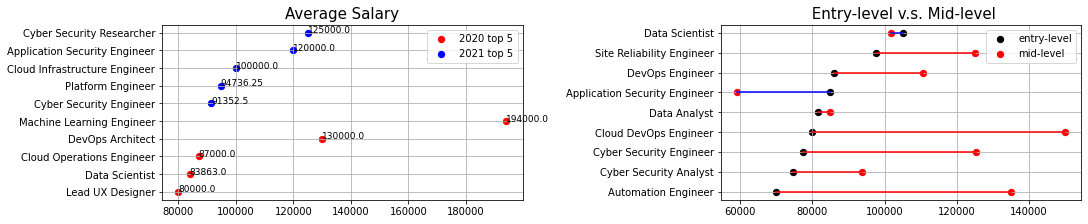

In [109]:
#plot two in one
plt.rcParams.update(bundles.neurips2021(usetex=False))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,3))
ax1.scatter(salary_2020[-5:], job_title_2020[-5:],c='r',label = '2020 top 5',s=40)
ax1.set_title("Average Salary",fontsize=15)
for i, label in enumerate(salary_2020[-5:]):
    ax1.annotate(label, (salary_2020[-5:][i], job_title_2020 [-5:][i]))

ax1.scatter(salary_2021[-5:], job_title_2021 [-5:],c='b',label='2021 top 5',s=40)
for i, label in enumerate(salary_2021[-5:]):
    ax1.annotate(label, (salary_2021[-5:][i],job_title_2021 [-5:][i]))
ax1.grid()
ax1.legend(prop={'size': 10})

ax2.scatter(lx, jobs,c='black',label = 'entry-level',s=40)
ax2.set_title(" Entry-level v.s. Mid-level",fontsize=15)
ax2.scatter(ly, jobs,c='r',label='mid-level',s=40)
for i, label in enumerate(jobs):
  if lx[i] >= ly[i]:
    ax2.plot([ly[i],lx[i]],[jobs[i],jobs[i]],color = 'b')
    # plt.arrow(x=ly[i], y=label, dx=lx[i]-ly[i], dy=0, width=.08, facecolor='g', edgecolor='none', head_width=0.8, head_length=0.2) 
  else:
    ax2.plot([lx[i],ly[i]],[jobs[i],jobs[i]],c = 'r')
  

plt.grid()
plt.legend(prop={'size': 10})
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
plt.savefig('salary_visualization.png')
plt.show()

In [89]:
dataset_2020[dataset_2020.job_title == 'Data Scientist'][dataset_2020.company_location== 'US']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1198,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
1294,2020,MI,FT,Data Scientist,45760,USD,45760,PH,100,US,S
1502,2020,MI,FT,Data Scientist,105000,USD,105000,US,100,US,L
2333,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
2335,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
2342,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
2343,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
2365,2020,SE,FT,Data Scientist,120000,USD,120000,US,50,US,L


In [90]:
dataset_2020[dataset_2020.job_title == 'Site Reliability Engineer'][dataset_2020.company_location== 'US']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1287,2020,EN,FT,Site Reliability Engineer,95000,USD,95000,US,100,US,L
1646,2020,SE,FT,Site Reliability Engineer,100000,USD,100000,US,100,US,L
1740,2020,SE,FT,Site Reliability Engineer,175000,USD,175000,US,100,US,L
1815,2020,SE,FT,Site Reliability Engineer,165000,USD,165000,US,100,US,M
1832,2020,MI,FT,Site Reliability Engineer,180000,USD,180000,US,50,US,L
1846,2020,MI,FT,Site Reliability Engineer,98000,USD,98000,US,100,US,M
1852,2020,SE,FT,Site Reliability Engineer,128000,USD,128000,US,100,US,L
1863,2020,SE,FT,Site Reliability Engineer,120000,USD,120000,US,100,US,L
1925,2020,SE,FT,Site Reliability Engineer,136000,USD,136000,US,50,US,L
1931,2020,MI,FT,Site Reliability Engineer,150000,USD,150000,US,100,US,L


In [100]:
dataset_2020[dataset_2020.job_title == 'Application Security Engineer'][dataset_2020.company_location== 'US']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1442,2020,SE,FT,Application Security Engineer,130000,USD,130000,US,100,US,L
1968,2020,EN,FT,Application Security Engineer,85000,USD,85000,US,100,US,L
2152,2020,MI,FT,Application Security Engineer,110000,USD,110000,US,50,US,L
2220,2020,MI,FT,Application Security Engineer,8223,USD,8223,IN,100,US,L
2276,2020,SE,FT,Application Security Engineer,108000,USD,108000,US,100,US,L
